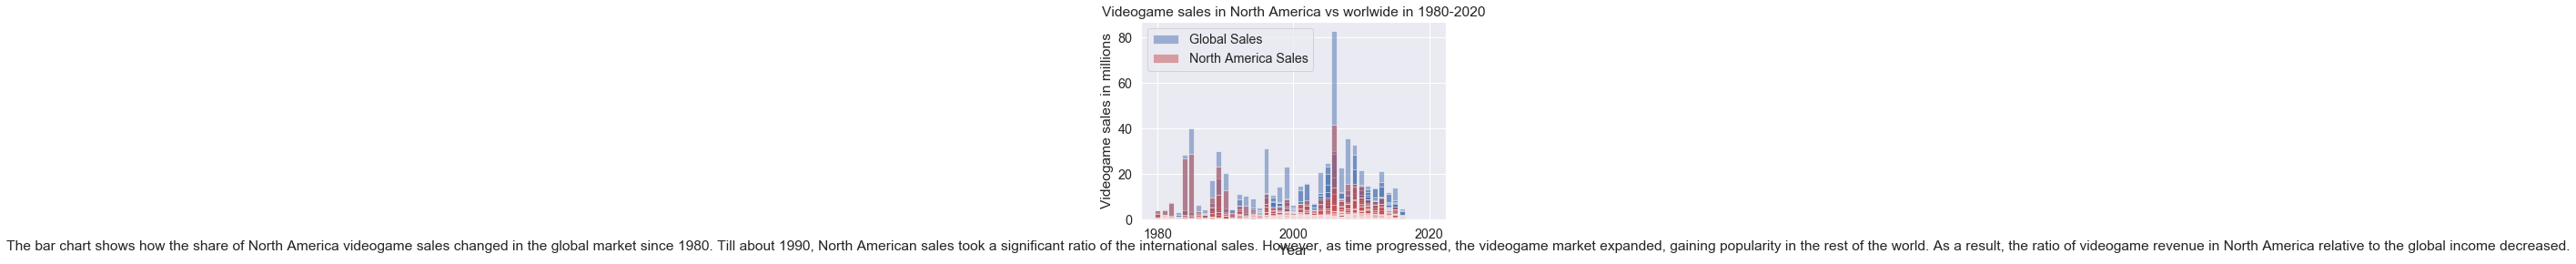

In [150]:
plt.bar(data["Year"], data["Global_Sales"], color='b', alpha=0.5, label = "Global Sales") #the bar chart for Global Sales
plt.bar(data["Year"], data["NA_Sales"], color='r', alpha=0.5, label = "North America Sales") #the bar chart for North American sales
plt.title("Videogame sales in North America vs worlwide in 1980-2020") #creating the title 
plt.xlabel("Year")
plt.ylabel("Videogame sales in millions")
txt="The bar chart shows how the share of North America videogame sales changed in the global market since 1980. Till about 1990, North American sales took a significant ratio of the international sales. However, as time progressed, the videogame market expanded, gaining popularity in the rest of the world. As a result, the ratio of videogame revenue in North America relative to the global income decreased."
plt.figtext(0.5, 0.01, txt, ha='center', wrap=True) #create the caption under the graph and wrap it
plt.xticks(np.arange(1980, 2025, step=20)) 
plt.legend()
plt.show()

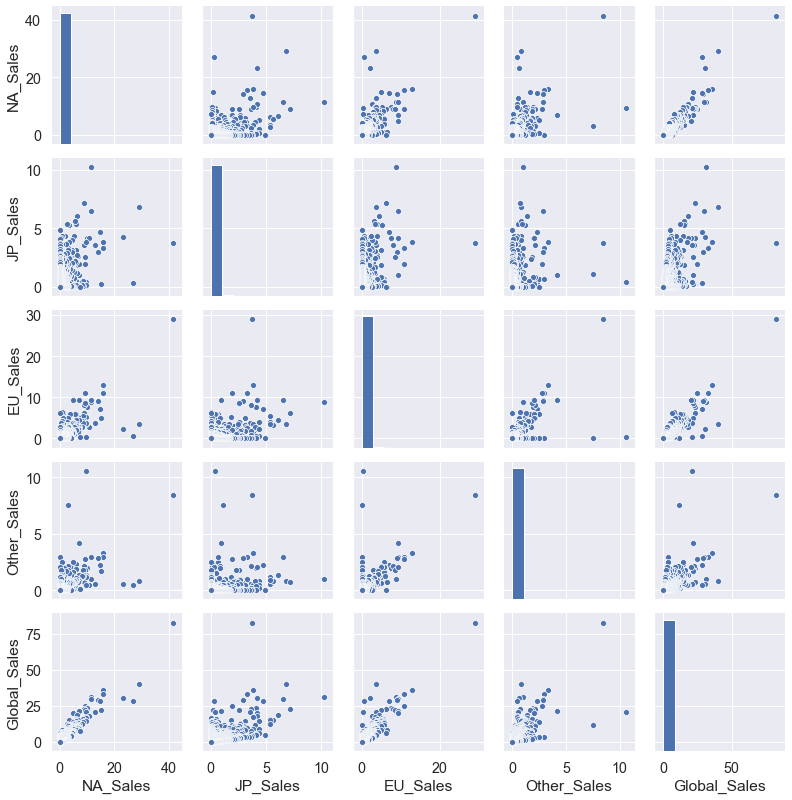

In [121]:
column_x = ["NA_Sales", "JP_Sales", "EU_Sales", "Other_Sales"] #predictors
column_y = 'Global_Sales' #response
columnstoplot = column_x + [column_y] #every predictor is correlated with the response 

sns.pairplot(data[columnstoplot], x_vars=columnstoplot, y_vars=columnstoplot, height=2.2) #creating 5*5 scatter plots 


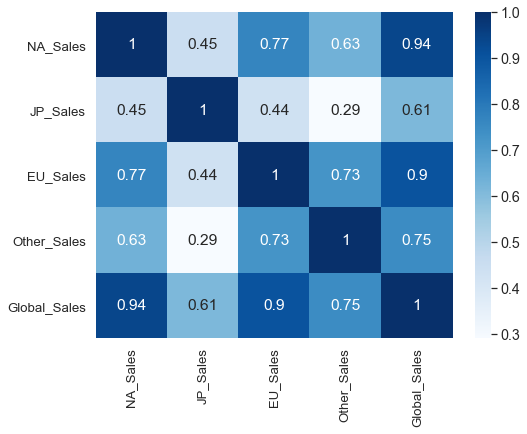

In [24]:
corrMatrix = data[columnstoplot].corr() #for every grid in the 5*5 matrix the correlation coefficient was calculated
f, ax = plt.subplots(figsize=(8, 6))
sns.set(font_scale=1.3)
sns.heatmap(corrMatrix, annot=True, cmap='Blues') #the coefficient was written down in every square 
plt.show()

In [16]:
# Import useful packages
import pandas
pandas.set_option('max_rows', 10)
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as statsmodels # useful stats package with regression functions
import seaborn as sns # very nice plotting package

# style settings
sns.set(color_codes=True, font_scale = 1.2)
sns.set_style("whitegrid")

# import and print data
# data = pandas.read_csv("soil_observations.csv") # requires file to be loaded in the directory
data = pandas.read_csv("vgsales.csv")
data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16286,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16287,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16288,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16289,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


The pearson's r value comparing NA_Sales to Global_Sales is: 0.941

R-squared =  0.886
Regression equation: Global_Sales =  1.794 * NA_Sales +  0.064


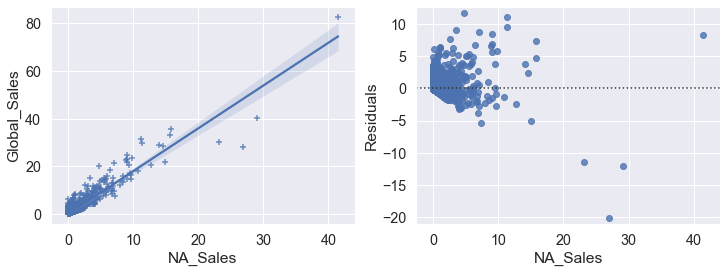

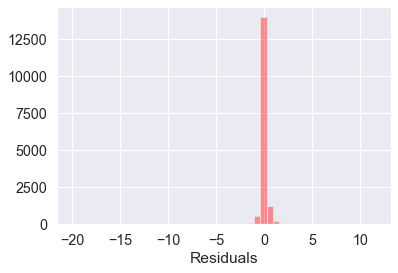

In [141]:
def pcorr(column_a, column_b): #the function accepts two variables and returns the Person's r value
    print("The pearson's r value comparing", column_a , "to", column_b , "is:", round(syndata[column_a].corr(syndata[column_b]),3))
    print("")
    
def regression_model(column_x, column_y): #the function builds three plots and gives the equation of the regression line
    # the function uses existing library functions to create a scatter plot with the predictor and response varibales,
    # plots of the residuals in a scatter plot and histogram, compute coefficient of determination,
    # and display the regression equation in the form y=bx+a

    # fit the regression line using "statsmodels" library
    X = statsmodels.add_constant(data[column_x])
    Y = data[column_y]
    regressionmodel = statsmodels.OLS(Y,X).fit() #here, OLS stands for "ordinary least squares"

    # extract regression parameters from OLS model above:
    Rsquared = round(regressionmodel.rsquared,3) #the values are rounded to the third decimal points
    slope = round(regressionmodel.params[1],3)
    intercept = round(regressionmodel.params[0],3)

    # make plots:
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, figsize=(12,4))
    sns.regplot(x=column_x, y=column_y, data=data, marker="+", ax=ax1) # a scatter plot
    sns.residplot(x=column_x, y=column_y, data=data, ax=ax2) # residual plot in a scatter plot
    ax2.set(ylabel='Residuals')
    ax2.set_ylim(min(regressionmodel.resid)-1,max(regressionmodel.resid)+1)
    plt.figure() # histogram with the distribution of residuals 
    sns.distplot(regressionmodel.resid, kde=False, axlabel='Residuals', color='red') # histogram

    pcorr(column_x, column_y)
    # print the computed results:
    print("R-squared = ",Rsquared)
    print("Regression equation: "+column_y+" = ",slope,"* "+column_x+" + ",intercept)

regression_model('NA_Sales','Global_Sales')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                 1.266e+05
Date:                Sun, 31 Jan 2021   Prob (F-statistic):               0.00
Time:                        21:57:49   Log-Likelihood:                -12749.
No. Observations:               16291   AIC:                         2.550e+04
Df Residuals:                   16289   BIC:                         2.552e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0644      0.004     14.777      0.000       0.056       0.073
NA_Sales       1.7938      0.005    355.783      0.000       1.784       1.804
==============================================================================
Omnibus:                     9587.887   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         38495037.040
Skew:                           1.093   Prob(JB):                         0.00
Kurtosis:                     241.131   Cond. No.                         1.42
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

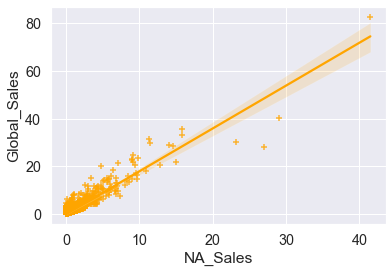

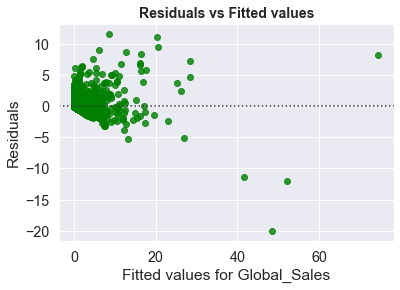

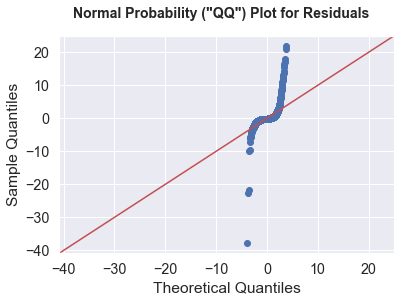

In [149]:
def mult_regression(column_x, column_y):

    if len(column_x)==1: #since it is a single variable regression model, the function takes only one predictor
        plt.figure()
        sns.regplot(x=column_x[0], y=column_y, data=data, marker="+",fit_reg=True,color='orange') #drawing a regression line
    
    # assign predictor X and response Y:
    X = data[column_x]
    X = statsmodels.add_constant(X)
    Y = data[column_y]
    
    # construct a linear regression model:
    global regressionmodel 
    regressionmodel = statsmodels.OLS(Y,X).fit() # here, OLS stands for ordinary least squares

    # creating a residual plot:
    plt.figure()
    residualplot = sns.residplot(x=regressionmodel.predict(), y=regressionmodel.resid, color='green')
    residualplot.set(xlabel='Fitted values for '+column_y, ylabel='Residuals')
    residualplot.set_title('Residuals vs Fitted values',fontweight='bold',fontsize=14)
    
    # QQ plot to check normality of residuals:
    qqplot = statsmodels.qqplot(regressionmodel.resid,fit=True,line='45')
    qqplot.suptitle("Normal Probability (\"QQ\") Plot for Residuals",fontweight='bold',fontsize=14)

mult_regression(['NA_Sales'],'Global_Sales')
regressionmodel.summary()

In [147]:
#confidence intervals

point_estimate = 1.794 #the slope of the regression line from a sample
t = stats.t.ppf(0.975, 16289) # n-2 for degress of freedom
SE = 0.005 #from summary statistics 

print("Confidence intervals: [", round( mean - t * SE, 3), ",", round( mean + t * SE, 3), "]")

Confidence intervals: [ 1.784 , 1.804 ]
